In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import FakeVigo
backend = FakeVigo()

Original depth: 7


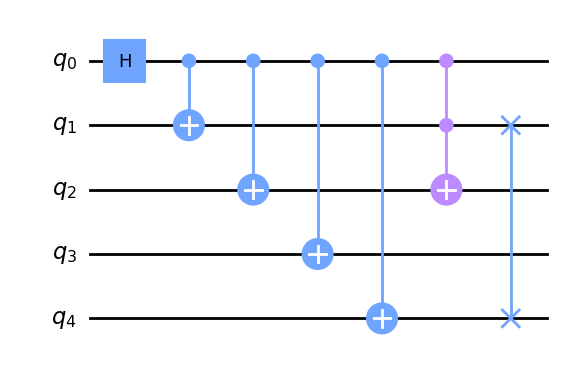

In [3]:
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1,5))
qc.ccx(0,1,2)
qc.swap(1,4)
print(f'Original depth: {qc.depth()}')

qc.draw(output='mpl')

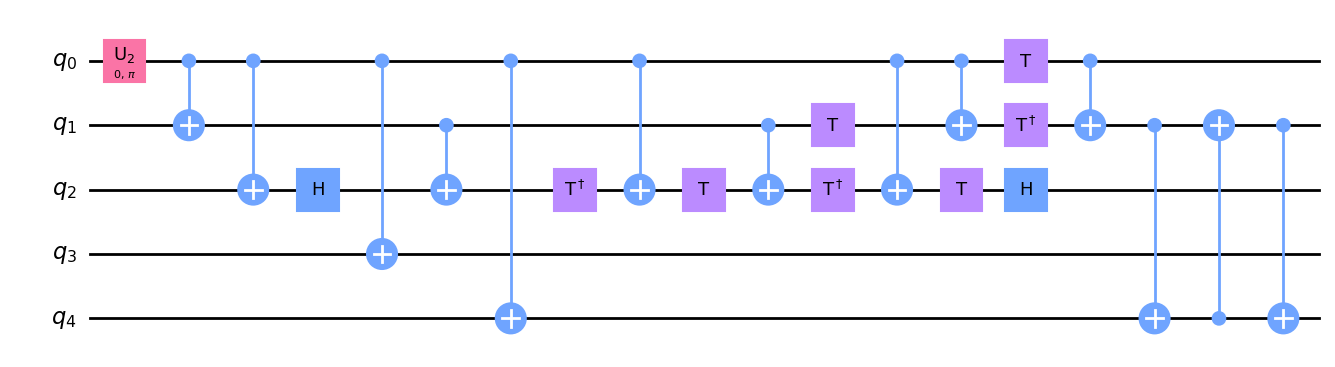

In [4]:
qc = qc.decompose()
qc.draw(output='mpl')

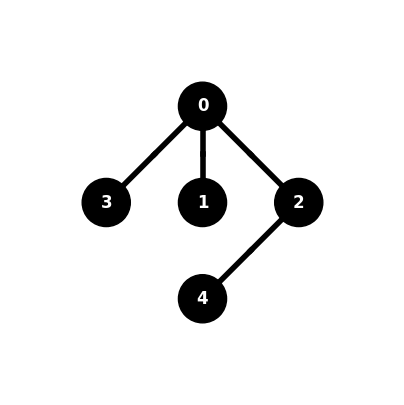

In [5]:
new_qc = transpile(qc, backend=backend, optimization_level=3)
plot_circuit_layout(new_qc, backend)

Final depth: 35


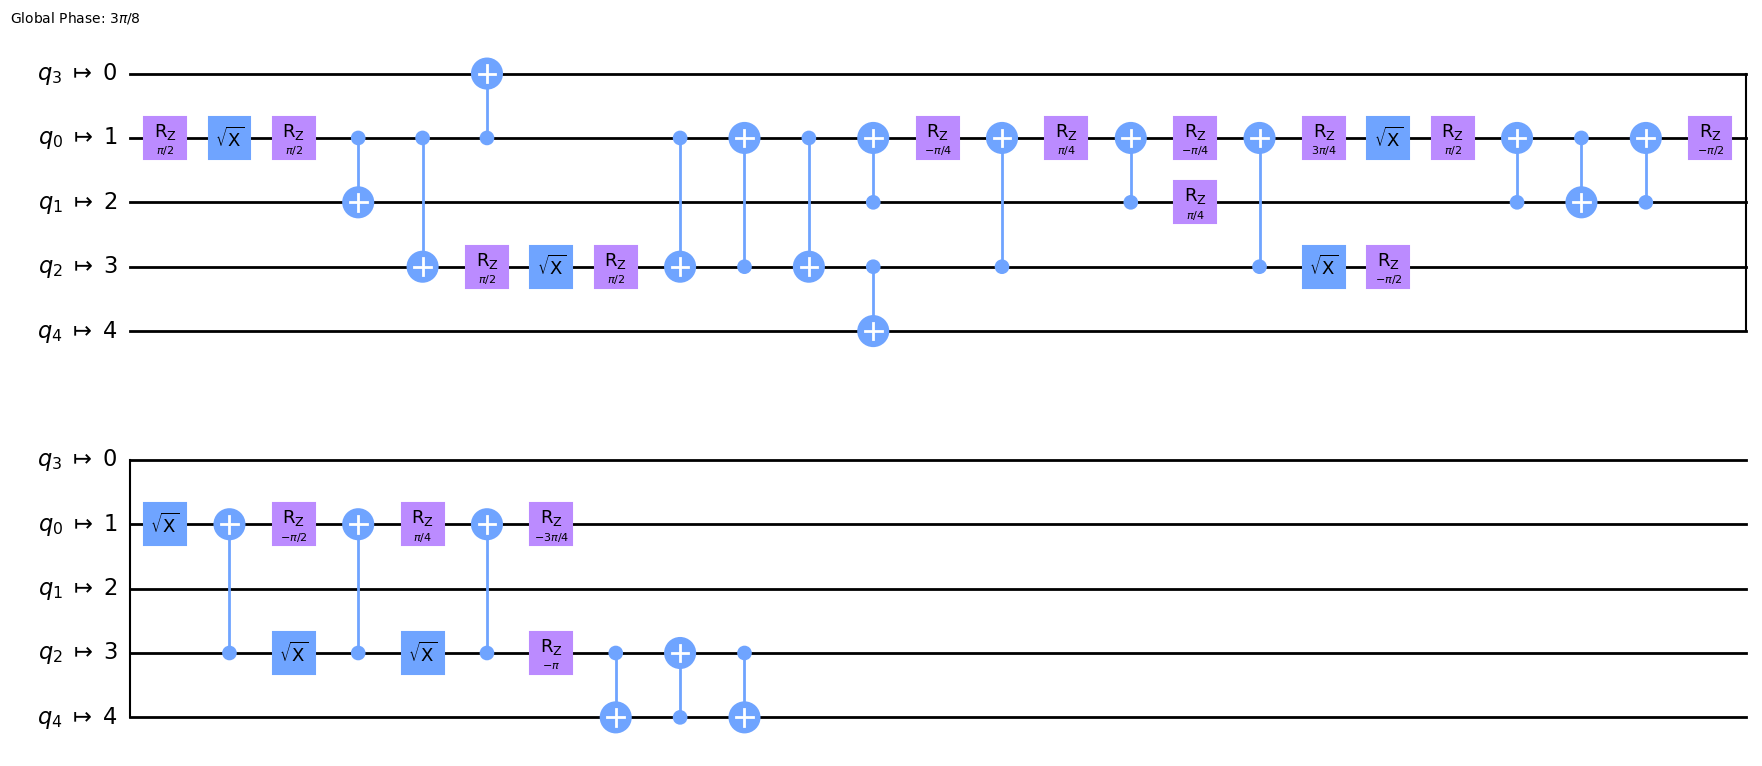

In [6]:
print(f'Final depth: {new_qc.depth()}')
new_qc.draw(output='mpl')